### EC3173

# Tarea1 - Análisis del fenómeno de retardo de encendido y apagado de los diodos

### Elaborado por : Mariana Arvelaiz
###                            15-10096 

#### Julio de 2022


### Introducción 

<p style='text-align: justify;'> Como parte del estudio del comportamiento de los diodos y la influencia de los materiales con loscuales son fabricados en su comportamiento, especificamente en sus retardos de encendido y apagado. Para estudiar los distintos comportamientos y características de los diodos se procedió a realizar multiples simulaciones que permitieron observar las diferencia entre sus tiempos de retardo en una aplicación real como es la retificación, además de realizar una simulación para un calculo aproximado del tiempo de retardo de encendido y de apagado. 


En este trabajo se estudiaron tres diodos de distintas aplicaciones,como lo son: un diodo de uso general, un diodo tipo Schottky y un diodo tipo Fast Recovery; siendo todos los diodos seleccionados diodos de potencia, ya que estos  son los que usualmente se usan para hacer la rectificación en fuentes de poder. 
    
 </p>

### Marco Teórico 

En las aplicaciones de circuitos de potencia, especialmente en fuentes conmutadas, la velocidad en la cual un diodo de unión pn cambia de estados es muy importante en la eficiencia de una fuente debido al tiempo que toma la transisión entre sus estados de encendido y apagado. 

Cuando un diodo funciona en su condición de polarización directa, su región de agotamiento (depletion region) se reduce a casi nada. Es decir, el dispositivo utilizará la tensión de alimentación externa aplicada para superar la barrera de potencial que se le impone debido a la presencia de portadores de carga inmóviles en su región de agotamiento. Ahora, imagine que uno polariza inversamente este voltaje invirtiendo las polaridades conectadas a los terminales del diodo. Idealmente, el hecho de hacerlo debería hacer que el diodo pase de su estado ENCENDIDO a APAGADO inmediatamente. Es decir, se espera que el diodo que conduce corriente en su dirección directa deje de conducir instantáneamente.

Es importante destacar, que durante los análisis teóricos, especialmente cuando se trabajan con los modelos ideales, no se toma en cuenta que el movimiento de los portadores en un juntura p-n no se hace de manera instantatanea 

La explicación física del tiempo que le toma a un diodo pasar a un diodo de encendido a apagado, luego de que el circuito cambiaron las condiciones es debido a la velocidad de los portadores mayoritarios y minoritarios (electrones y protones); ya que sus velocidades máximas son distintas lo que hace que el cambio de estado o el movimiento de estas particulas en la juntura p-n se hagan en tiempos distintos. Esto se traduce en la existencia de los llamados retardos de encendido y apagado.

Durante este tiempo de recuperación inversa del diodo, se puede ver que habrá una cantidad bastante grande de corriente fluyendo a través del diodo, pero en la dirección opuesta.

- Tiempo de recuperacion de encendido (ton): Es el tiempo requerido para que el voltaje alcance un valor especificado(normalmente el 110 % de la caída de tensión directa en estado estacionario),después de un cambio instantáneo de cero o de un valor especificadovoltaje inverso a una condición de polarización directa especificada(corriente directa).Este tiempo de recuperación es especialmente notorio cuando más alto las corrientes deben cambiarse en un breve período de tiempo. La razón es que la resistencia hacia adelante durante el tiempo de encendido podría ser mayor que la corriente continua (comportamiento inductivo). Esto puede resultar en la destrucción de un diodo debido a la alta pérdida de potencia instantánea si se utiliza control de corriente constante.
- Tiempo de recuperación inversa, trrEl tiempo requerido para que la corriente alcance una inversa especificada corriente, iR (normalmente 0,25 A), después de la conmutación instantánea de un IF de corriente directa especificado (normalmente 0,5 A) a un IR de corriente inversa especificada (normalmente 1,0 A).


### Descripción de los diodos y simulaciones

#### Diodos de uso General

Para estas simulaciones se selecciono el diodo RRE02VSM6S fabricado por la compañia ROHM Semiconductor. Entre las características principales de este diodo de rectificación RRE02VSM6S se encuentran resumidas en la siguiente imagen:
<center>
<img src="imagenes/RRE02VSM6S_spec.png" alt="fishy" class="bg-primary mb-1" width="400px">
<figcaption align="center">
<b>Fig. 2</b>Especificaciones Diodo RRE02VSM6S
</figcaption></center>

Para evaluar su comportamiento a 



#### Diodos Schottky

Este tipo de diodos se usan con frecuencia en aplicaciones de fuentes de poder, y entre sus principales se encuentran:
- Baja caída de tensión directa (forward voltage). Donde la caída de tensión directa de un diodo Schottky es sustancialmente menor que los 0,7 voltios del diodo de unión pn de silicio convencional.

- Velocidades de conmutación muy altas, que pueden considerarse muy cercanas a la idealización de la toma de tiempo cero para trabajo con fuentes conmutadas


Para estas simulaciones se selecciono el diodo XXXXXX fabricado por la compañia XXXX. Entre las características principales del diodo Schottky XXXXX se encuentran resumidas en la siguiente tabla:

------------------------------------------------------------


#### Diodos Fast Recovery



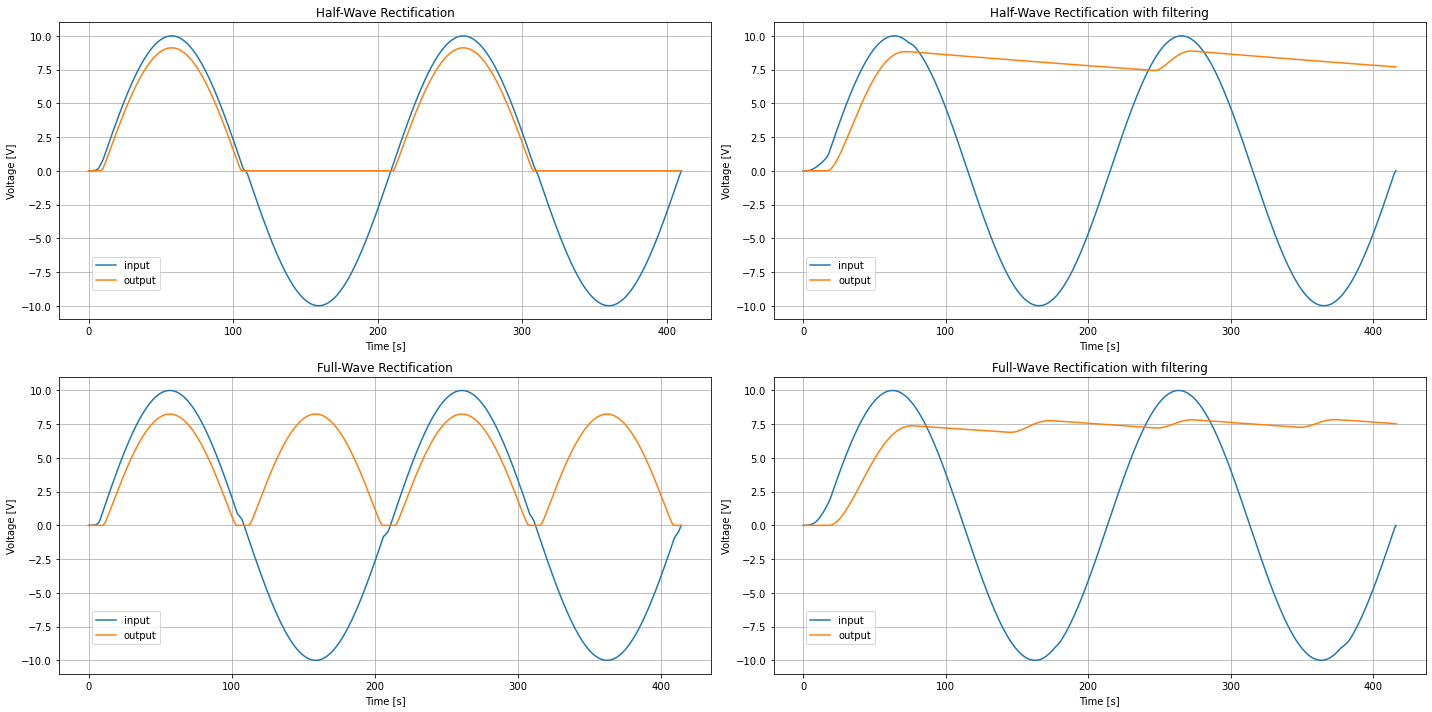

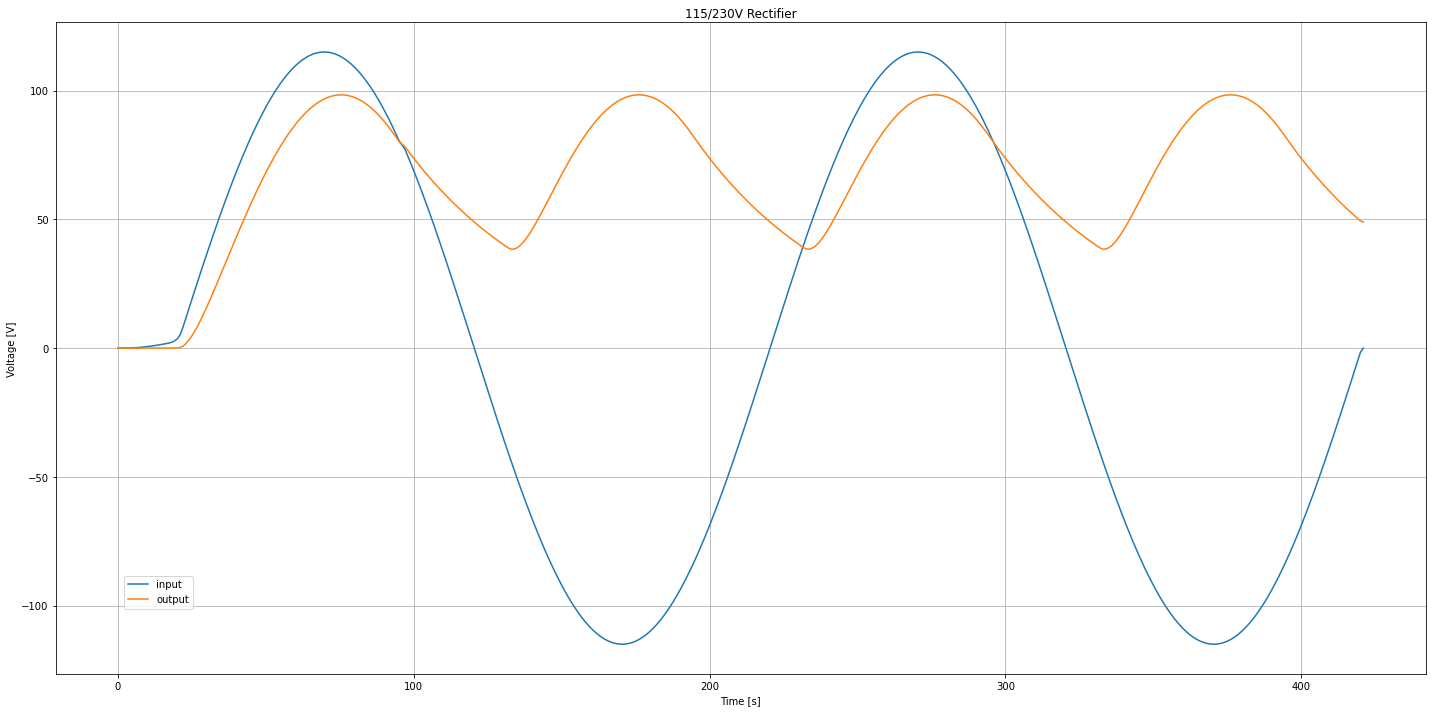

In [4]:
#r# This example depicts half and full wave rectification.

####################################################################################################

import matplotlib.pyplot as plt

####################################################################################################

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

####################################################################################################

from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

####################################################################################################

libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)

####################################################################################################

figure1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

####################################################################################################

circuit = Circuit('half-wave rectification')
circuit.include(spice_library['1N4148'])
source = circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=10@u_V, frequency=50@u_Hz)
circuit.X('D1', '1N4148', 'in', 'output')
circuit.R('load', 'output', circuit.gnd, 100@u_Ω)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

ax1.set_title('Half-Wave Rectification')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Voltage [V]')
ax1.grid()
ax1.plot(analysis['in'])
ax1.plot(analysis.output)
ax1.legend(('input', 'output'), loc=(.05,.1))
ax1.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

####################################################################################################

#f# circuit_macros('half-wave-rectification.m4')

circuit.C('1', 'output', circuit.gnd, 1@u_mF)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

ax2.set_title('Half-Wave Rectification with filtering')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Voltage [V]')
ax2.grid()
ax2.plot(analysis['in'])
ax2.plot(analysis.output)
ax2.legend(('input', 'output'), loc=(.05,.1))
ax2.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

####################################################################################################

circuit = Circuit('half-wave rectification')
circuit.include(spice_library['1N4148'])
source = circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=10, frequency=50)
circuit.X('D1', '1N4148', 'in', 'output_plus')
circuit.R('load', 'output_plus', 'output_minus', 100@u_Ω)
circuit.X('D2', '1N4148', 'output_minus', circuit.gnd)
circuit.X('D3', '1N4148', circuit.gnd, 'output_plus')
circuit.X('D4', '1N4148', 'output_minus', 'in')

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

ax3.set_title('Full-Wave Rectification')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Voltage [V]')
ax3.grid()
ax3.plot(analysis['in'])
ax3.plot(analysis.output_plus - analysis.output_minus)
ax3.legend(('input', 'output'), loc=(.05,.1))
ax3.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

####################################################################################################

#f# circuit_macros('full-wave-rectification.m4')

circuit.C('1', 'output_plus', 'output_minus', 1@u_mF)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

ax4.set_title('Full-Wave Rectification with filtering')
ax4.set_xlabel('Time [s]')
ax4.set_ylabel('Voltage [V]')
ax4.grid()
ax4.plot(analysis['in'])
ax4.plot(analysis.output_plus - analysis.output_minus)
ax4.legend(('input', 'output'), loc=(.05,.1))
ax4.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

plt.tight_layout()

#f# save_figure('figure1', 'rectification.png')

####################################################################################################

circuit = Circuit('115/230V Rectifier')
circuit.include(spice_library['1N4148'])
on_115 = True # switch to select 115 or 230V
if on_115:
    node_230 = circuit.gnd
    node_115 = 'node_115'
    amplitude = 115@u_V
else:
    node_230 = 'node_230'
    node_115 = circuit.gnd
    amplitude = 230@u_V
source = circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=amplitude, frequency=50) # Fixme: rms
circuit.X('D1', '1N4148', 'in', 'output_plus')
circuit.X('D3', '1N4148', node_230, 'output_plus')
circuit.X('D2', '1N4148', 'output_minus', node_230)
circuit.X('D4', '1N4148', 'output_minus', 'in')
circuit.C('1', 'output_plus', node_115, 1@u_mF)
circuit.C('2', node_115, 'output_minus', 1@u_mF)
circuit.R('load', 'output_plus', 'output_minus', 10@u_Ω)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
if on_115:
    simulator.initial_condition(node_115=0)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

figure2, ax = plt.subplots(figsize=(20, 10))
ax.set_title('115/230V Rectifier')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage [V]')
ax.grid()
ax.plot(analysis['in'])
ax.plot(analysis.output_plus - analysis.output_minus)
ax.legend(('input', 'output'), loc=(.05,.1))
# ax.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

plt.tight_layout()

#f# save_figure('figure2', 'universal-rectifier.png')

plt.show()



### Conclusiones y Análisis final de resultados



### Referencias

- _"Introduction to Schottky Rectifiers"_ -MicroNotes por Kent Walters y Bob Werner. https://www.microsemi.com/document-portal/doc_view/14630-introduction-to-schottky-rectifiers

- _"Basic Knowledge of Discrete Semiconductor Device"_ -Toshiba Electronic Devices & Storage Corporation (Febrero 2022). https://toshiba.semicon-storage.com/content/dam/toshiba-ss-v2/master/en/semiconductor/knowledge/e-learning/discrete/discrete-basic-chap2_en.pdf

- _"Rectifiers"_ - VISHAY GENERAL SEMICONDUCTOR. https://www.vishay.com/docs/84064/anphyexp.pdf



#### Especificaciones de los diodos selecionados:

https://www.nexperia.com/products/diodes/automotive-diodes/automotive-switching-diodes/automotive-general-purpose-switching-diodes/BAS21QC-Q.html

- _"RRE02VSM6S"_ -ROHM Semiconductor
https://www.rohm.com/products/diodes/rectifier-diodes/standard/rre02vsm6s-product#productDetail


$$
  w_{t+1} = (1 + r_{t+1}) s(w_t) + y_{t+1}
$$ 

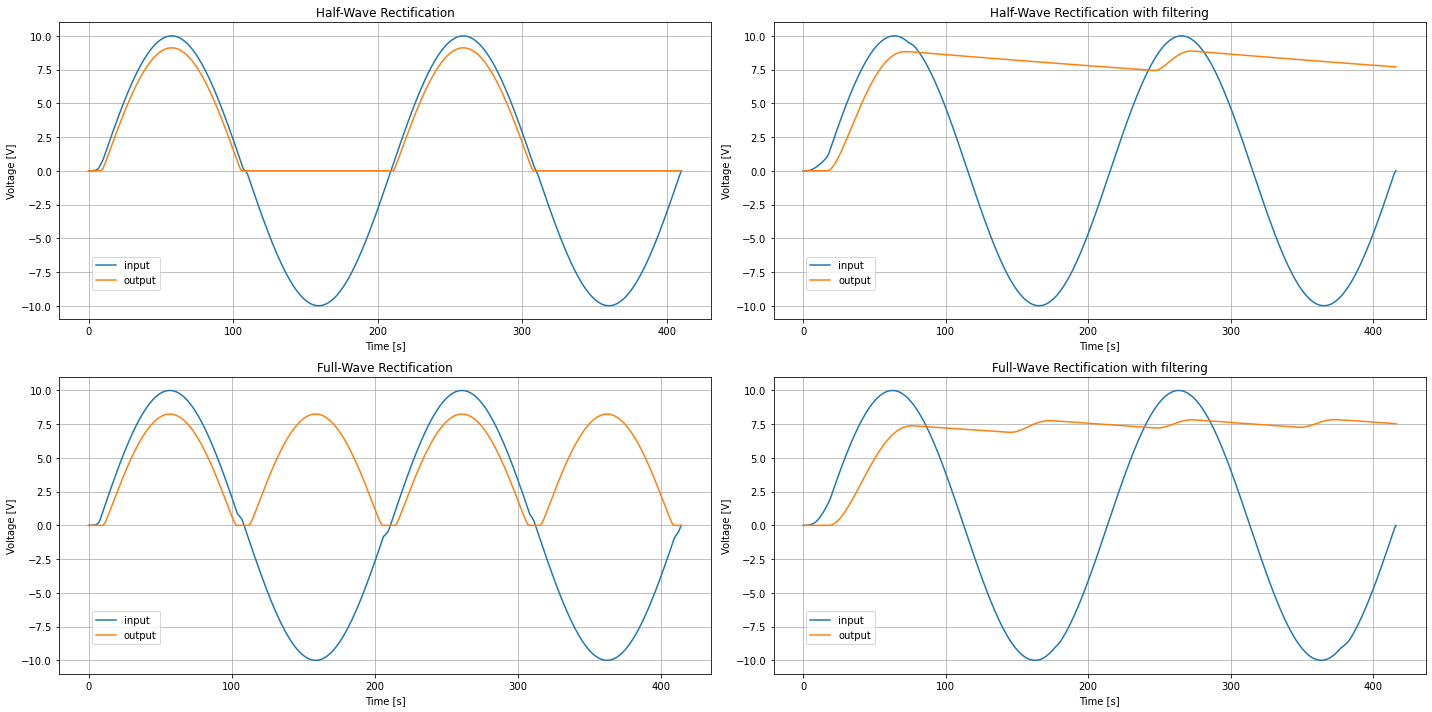

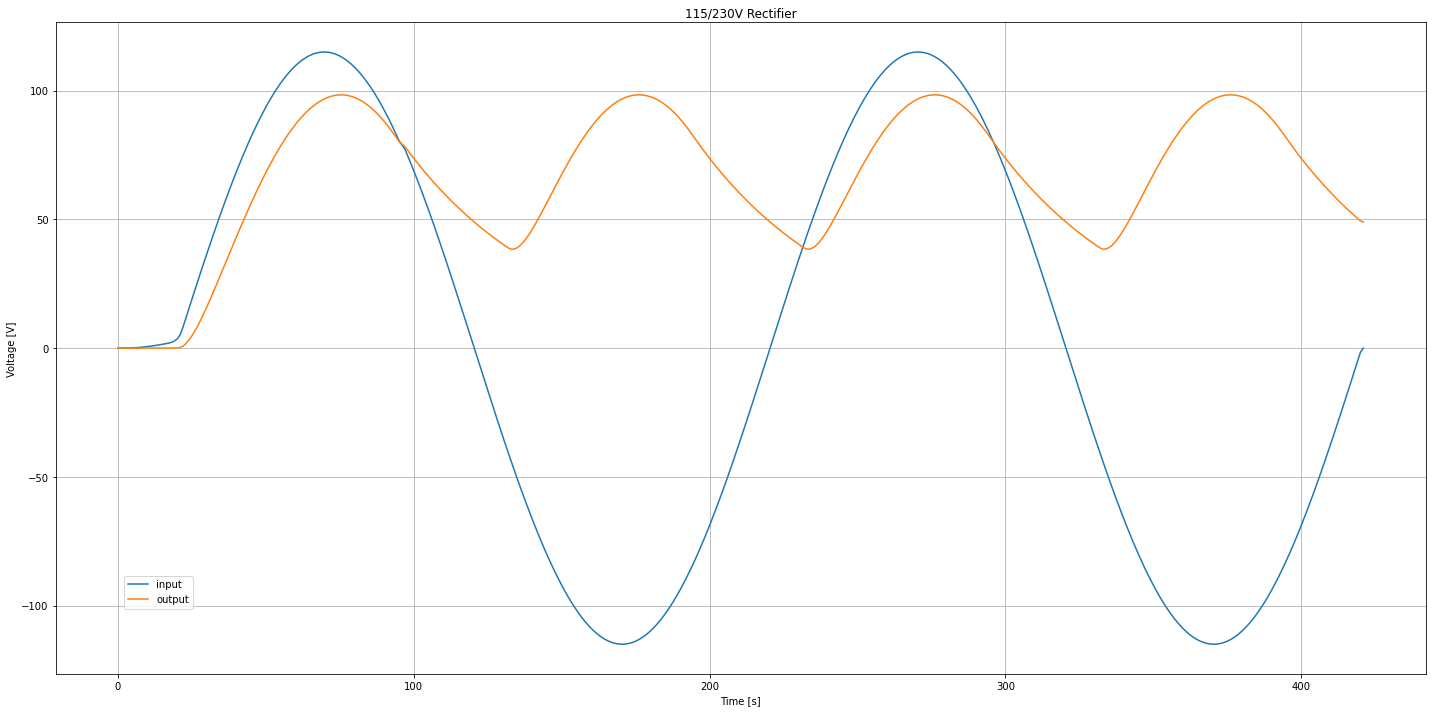

In [13]:
#r# This example depicts half and full wave rectification.

####################################################################################################

import matplotlib.pyplot as plt

####################################################################################################

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

####################################################################################################

from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

####################################################################################################

libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)

####################################################################################################

figure1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

####################################################################################################

circuit = Circuit('half-wave rectification')
circuit.include(spice_library['1N4148'])
source = circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=10@u_V, frequency=50@u_Hz)
circuit.X('D1', '1N4148', 'in', 'output')
circuit.R('load', 'output', circuit.gnd, 100@u_Ω)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

ax1.set_title('Half-Wave Rectification')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Voltage [V]')
ax1.grid()
ax1.plot(analysis['in'])
ax1.plot(analysis.output)
ax1.legend(('input', 'output'), loc=(.05,.1))
ax1.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

####################################################################################################

#f# circuit_macros('half-wave-rectification.m4')

circuit.C('1', 'output', circuit.gnd, 1@u_mF)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

ax2.set_title('Half-Wave Rectification with filtering')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Voltage [V]')
ax2.grid()
ax2.plot(analysis['in'])
ax2.plot(analysis.output)
ax2.legend(('input', 'output'), loc=(.05,.1))
ax2.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

####################################################################################################

circuit = Circuit('half-wave rectification')
circuit.include(spice_library['1N4148'])
source = circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=10, frequency=50)
circuit.X('D1', '1N4148', 'in', 'output_plus')
circuit.R('load', 'output_plus', 'output_minus', 100@u_Ω)
circuit.X('D2', '1N4148', 'output_minus', circuit.gnd)
circuit.X('D3', '1N4148', circuit.gnd, 'output_plus')
circuit.X('D4', '1N4148', 'output_minus', 'in')

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

ax3.set_title('Full-Wave Rectification')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Voltage [V]')
ax3.grid()
ax3.plot(analysis['in'])
ax3.plot(analysis.output_plus - analysis.output_minus)
ax3.legend(('input', 'output'), loc=(.05,.1))
ax3.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

####################################################################################################

#f# circuit_macros('full-wave-rectification.m4')

circuit.C('1', 'output_plus', 'output_minus', 1@u_mF)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

ax4.set_title('Full-Wave Rectification with filtering')
ax4.set_xlabel('Time [s]')
ax4.set_ylabel('Voltage [V]')
ax4.grid()
ax4.plot(analysis['in'])
ax4.plot(analysis.output_plus - analysis.output_minus)
ax4.legend(('input', 'output'), loc=(.05,.1))
ax4.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

plt.tight_layout()

#f# save_figure('figure1', 'rectification.png')

####################################################################################################

circuit = Circuit('115/230V Rectifier')
circuit.include(spice_library['1N4148'])
on_115 = True # switch to select 115 or 230V
if on_115:
    node_230 = circuit.gnd
    node_115 = 'node_115'
    amplitude = 115@u_V
else:
    node_230 = 'node_230'
    node_115 = circuit.gnd
    amplitude = 230@u_V
source = circuit.SinusoidalVoltageSource('input', 'in', circuit.gnd, amplitude=amplitude, frequency=50) # Fixme: rms
circuit.X('D1', '1N4148', 'in', 'output_plus')
circuit.X('D3', '1N4148', node_230, 'output_plus')
circuit.X('D2', '1N4148', 'output_minus', node_230)
circuit.X('D4', '1N4148', 'output_minus', 'in')
circuit.C('1', 'output_plus', node_115, 1@u_mF)
circuit.C('2', node_115, 'output_minus', 1@u_mF)
circuit.R('load', 'output_plus', 'output_minus', 10@u_Ω)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
if on_115:
    simulator.initial_condition(node_115=0)
analysis = simulator.transient(step_time=source.period/200, end_time=source.period*2)

figure2, ax = plt.subplots(figsize=(20, 10))
ax.set_title('115/230V Rectifier')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Voltage [V]')
ax.grid()
ax.plot(analysis['in'])
ax.plot(analysis.output_plus - analysis.output_minus)
ax.legend(('input', 'output'), loc=(.05,.1))
# ax.set_ylim(float(-source.amplitude*1.1), float(source.amplitude*1.1))

plt.tight_layout()

#f# save_figure('figure2', 'universal-rectifier.png')

plt.show()



![image](imagenes/Untitled-1.png)